In [17]:
import numpy as np

def equation1(x):
    return 2*x**4 - 8*x**3 - 16*x**2 - 1

def equation2(x):
    return 2*x**4 + 4*x**3 + x**2 + 3*x - 6

def derivative1(x):
    return 8*x**3 - 24*x**2 - 32*x

def derivative2(x):
    return 8*x**3 + 12*x**2 + 2*x + 3

def bisection_method(func, a, b, tolerance):
    while (b - a) / 2 > tolerance:
        c = (a + b) / 2
        if func(c) == 0:
            return c
        elif func(c) * func(a) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

def chord_method(func, a, b, tolerance, max_iter=1000):
    x0 = (a + b) / 2
    for _ in range(max_iter):
        if abs(func(x0)) < tolerance:
            return x0
        if func(a) == func(b):
            return "Division by zero error. Choose a different initial guess or use another method."
        x0 = a - func(a) * (b - a) / (func(b) - func(a))
        if abs(func(x0)) < tolerance:
            return x0
        if func(x0) * func(a) < 0:
            b = x0
        else:
            a = x0
    return "Method did not converge within the specified number of iterations."

tolerance = 0.001

root1_bisection = bisection_method(equation1, -2, 2, tolerance)
root1_chord = chord_method(equation1, -2, 2, tolerance)

root2_bisection = bisection_method(equation2, -2, 2, tolerance)
root2_chord = chord_method(equation2, -2, 2, tolerance)

print("Результати для рівняння 1:")
print("Метод половинного ділення:", root1_bisection)
print("Метод хорд:", root1_chord)

print("\nРезультати для рівняння 2:")
print("Метод половинного ділення:", root2_bisection)
print("Метод хорд:", root2_chord)

Результати для рівняння 1:
Метод половинного ділення: -1.4970703125
Метод хорд: -1.4961695988018193

Результати для рівняння 2:
Метод половинного ділення: 0.8056640625
Метод хорд: 0.8055865650486536


Значення у точці -1.2: nan
Значення у точці 0.5: nan
Значення у точці 2.5: nan


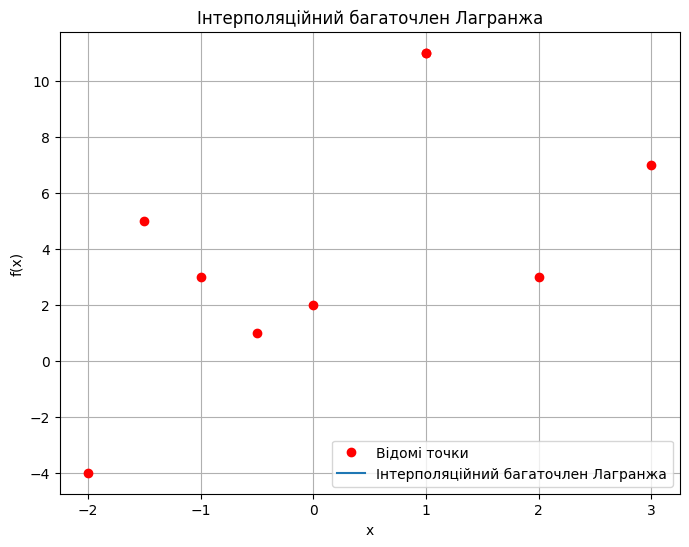

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

xi = np.array([-2, -1, 0, 1, 3, -1.5, -0.5, 1, 2])
yi = np.array([-4, 3, 2, 11, 7, 5, 1, 11, 3])

poly = lagrange(xi, yi)

points_to_compute = np.array([-1.2, 0.5, 2.5])

approx_values = poly(points_to_compute)

for i, point in enumerate(points_to_compute):
    print(f"Значення у точці {point}: {approx_values[i]:.3f}")

x_vals = np.linspace(xi.min(), xi.max(), 1000)
y_vals = poly(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(xi, yi, 'ro', label='Відомі точки')
plt.plot(x_vals, y_vals, label='Інтерполяційний багаточлен Лагранжа')
plt.title('Інтерполяційний багаточлен Лагранжа')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


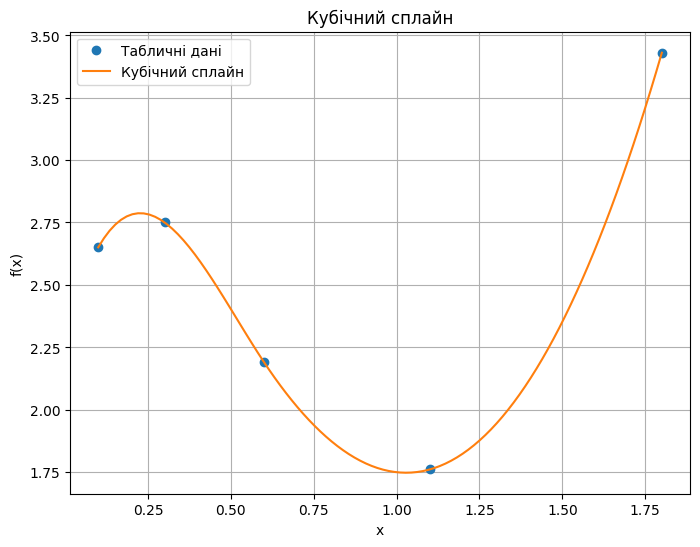

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

i = np.array([0, 1, 2, 3, 4])
x = np.array([0.1, 0.3, 0.6, 1.1, 1.8])
y = np.array([2.65, 2.75, 2.19, 1.76, 3.43])

cs = CubicSpline(x, y)

x_vals = np.linspace(x.min(), x.max(), 100)

y_vals = cs(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Табличні дані')
plt.plot(x_vals, y_vals, label='Кубічний сплайн')
plt.title('Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


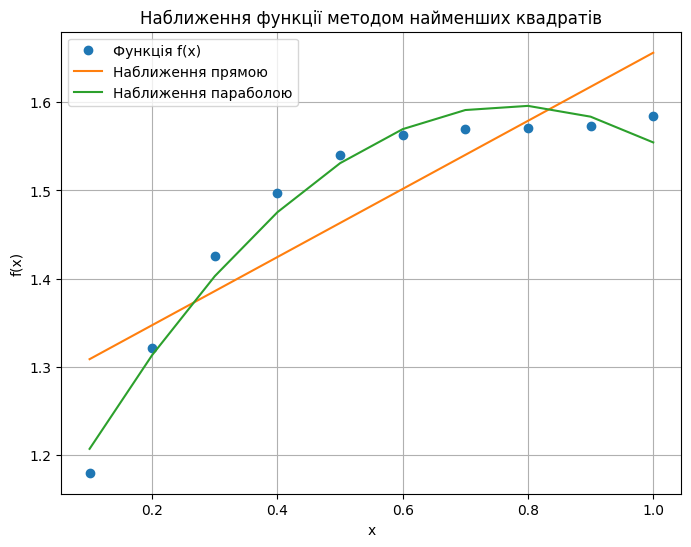

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def f(x):
    return np.cos(2 * x) + 2 * x

x = np.arange(0.1, 1.1, 0.1)

y = f(x)

def linear_func(x, a, b):
    return a * x + b

def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

res_linear = least_squares(lambda params: linear_func(x, *params) - y, [1, 1])

res_quadratic = least_squares(lambda params: quadratic_func(x, *params) - y, [1, 1, 1])

a_lin, b_lin = res_linear.x
a_quad, b_quad, c_quad = res_quadratic.x

plt.figure(figsize=(8, 6))

plt.plot(x, y, 'o', label='Функція f(x)')

plt.plot(x, linear_func(x, a_lin, b_lin), label='Наближення прямою')

plt.plot(x, quadratic_func(x, a_quad, b_quad, c_quad), label='Наближення параболою')

plt.title('Наближення функції методом найменших квадратів')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
from scipy import integrate
import numpy as np

def integrand(x):
    return 1 / np.sqrt(x) / (2 * x + 3)

a = 0.8
b = 1.4

result_rectangle, _ = integrate.fixed_quad(integrand, a, b, n=10)

result_simpson = integrate.simps(integrand(np.linspace(a, b, 8)), np.linspace(a, b, 8))

result_trapezoid = integrate.trapz(integrand(np.linspace(a, b, 20)), np.linspace(a, b, 20))

print(f"Значення інтегралу методом прямокутників: {result_rectangle:.5f}")
print(f"Значення інтегралу методом Сімпсона: {result_simpson:.5f}")
print(f"Значення інтегралу методом трапецій: {result_trapezoid:.5f}")


Значення інтегралу методом прямокутників: 0.11217
Значення інтегралу методом Сімпсона: 0.11217
Значення інтегралу методом трапецій: 0.11218


In [11]:
from scipy import integrate
import numpy as np

def integrand(x):
    return np.sqrt(x) * np.cos(x**2)

a = 0.4
b = 1.2

result_rectangle, _ = integrate.fixed_quad(integrand, a, b, n=10)

result_simpson = integrate.simps(integrand(np.linspace(a, b, 8)), np.linspace(a, b, 8))

result_trapezoid = integrate.trapz(integrand(np.linspace(a, b, 20)), np.linspace(a, b, 20))

print(f"Значення інтегралу методом прямокутників: {result_rectangle:.5f}")
print(f"Значення інтегралу методом Сімпсона: {result_simpson:.5f}")
print(f"Значення інтегралу методом трапецій: {result_trapezoid:.5f}")


Значення інтегралу методом прямокутників: 0.48411
Значення інтегралу методом Сімпсона: 0.48412
Значення інтегралу методом трапецій: 0.48363


In [10]:
from scipy import integrate
import numpy as np

def integrand(x):
    return 1 / np.sqrt(3 * x**2 - 0.4)

a = 1.3
b = 2.1

result_rectangle, _ = integrate.fixed_quad(integrand, a, b, n=10)

result_simpson = integrate.simps(integrand(np.linspace(a, b, 8)), np.linspace(a, b, 8))

result_trapezoid = integrate.trapz(integrand(np.linspace(a, b, 20)), np.linspace(a, b, 20))

print(f"Значення інтегралу методом прямокутників: {result_rectangle:.5f}")
print(f"Значення інтегралу методом Сімпсона: {result_simpson:.5f}")
print(f"Значення інтегралу методом трапецій: {result_trapezoid:.5f}")


Значення інтегралу методом прямокутників: 0.28421
Значення інтегралу методом Сімпсона: 0.28421
Значення інтегралу методом трапецій: 0.28424
